Таблица содержит данные о классификации писем на «спам»/«не спам» и общее количество слов, входящих в эти группы:

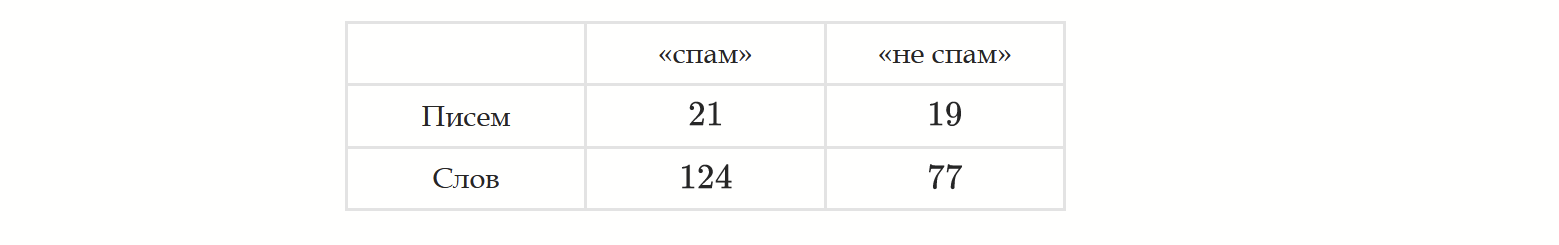

Во второй таблице представлены данные, по уникальным словам, и числу их вхождений в указанные группы:

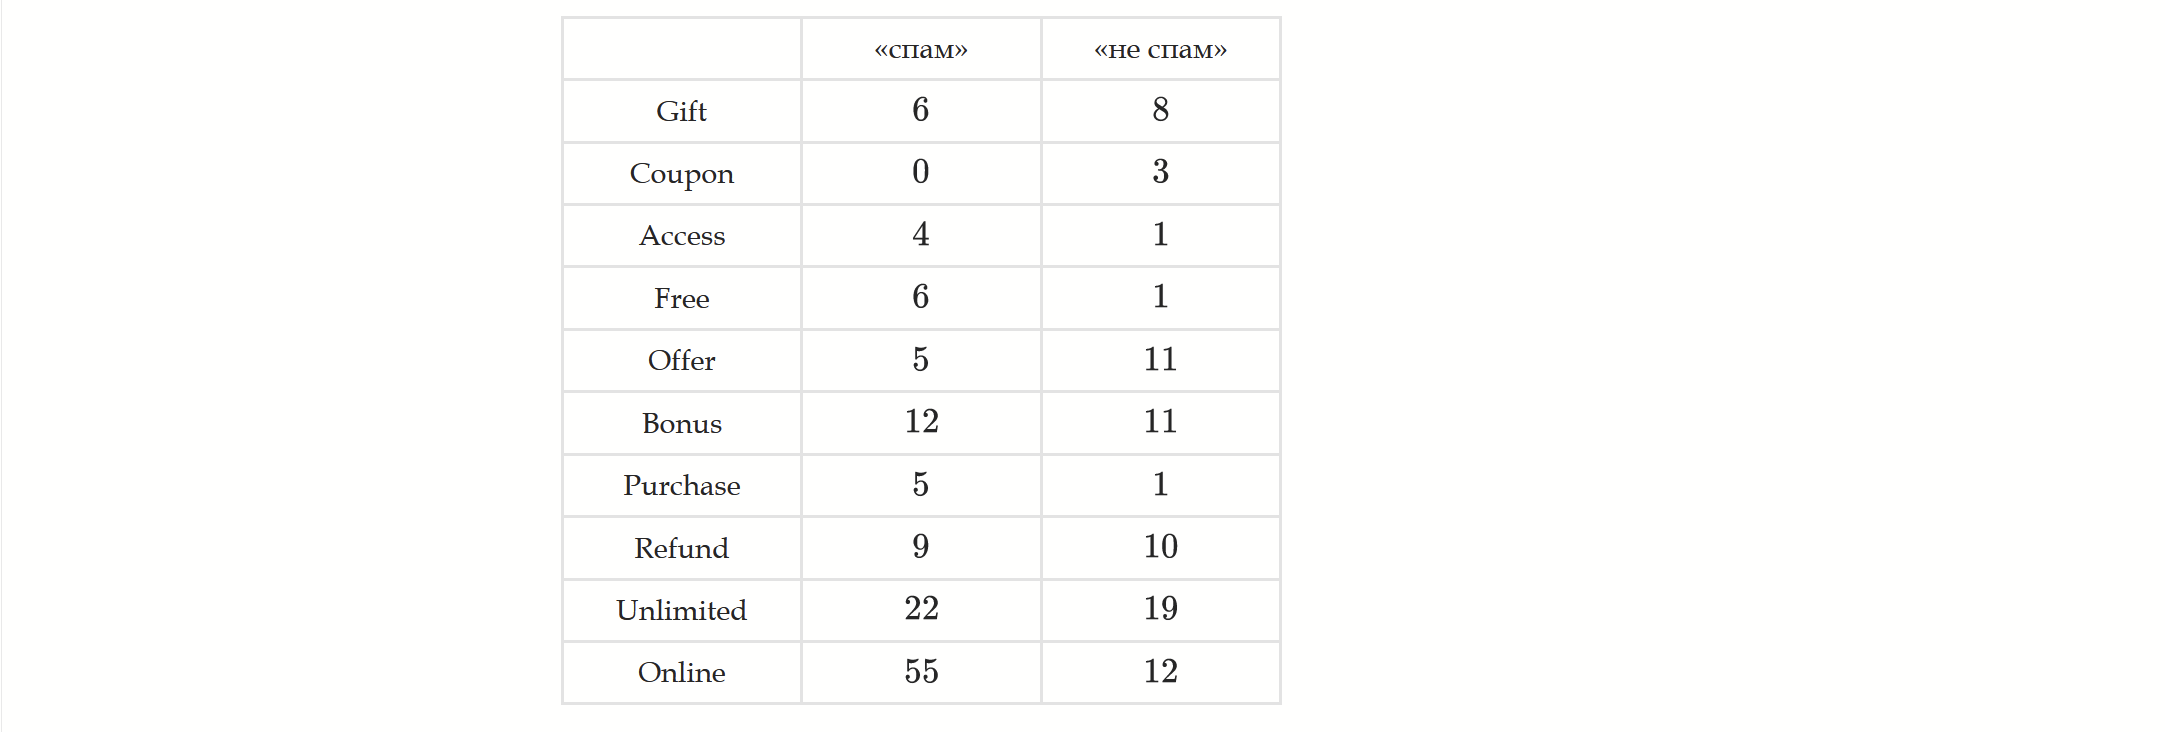

Ваша задача построить модель наивного байесовского классификатора и определить класс, к которому будет
отнесено письмо, содержащее текст:

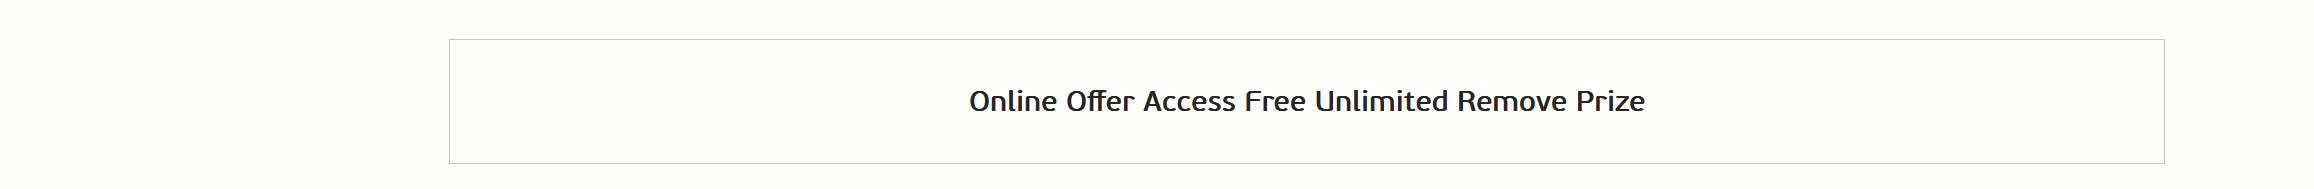

- Определите вероятность того, что письмо является спамом, исходя из тренировочного набора данных
- Вычислите F(«спам»)
- Вычислите F(«не спам»)
- Вычислите вероятность P(Класс=«спам»|Письмо), что письмо Online Offer Access Free Unlimited Remove Prize является спамом

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data_class = pd.DataFrame({'спам':[21, 124], 'не спам':[19, 77]},
                           index=['Писем', 'Слов'])
print('Таблица содержит данные о классификации писем')
data_class

Таблица содержит данные о классификации писем


,спам,не спам
Писем,21,19
Слов,124,77


In [3]:
data = pd.DataFrame({'спам':[6, 0, 4, 6, 5, 12, 5, 9, 22, 55],
                     'не спам':[8, 3, 1, 1, 11, 11, 1, 10, 19, 12]},
                    index=['Gift', 'Coupon', 'Access', 'Free',
                           'Offer', 'Bonus', 'Purchase', 'Refund',
                           'Unlimited', 'Online'])
print('Таблица содержит данные об уникальных словах')
data

Таблица содержит данные об уникальных словах


,спам,не спам
Gift,6,8
Coupon,0,3
Access,4,1
Free,6,1
Offer,5,11
Bonus,12,11
Purchase,5,1
Refund,9,10
Unlimited,22,19
Online,55,12


In [4]:
all = sum(data['не спам'].tolist()) + sum(data['спам'].tolist())
all_spam = data['спам'].sum()
print('Всего слов: ', all)
print('Слов в классе "спам":', all_spam)

Всего слов:  201
Слов в классе "спам": 124


In [5]:
new_letter = ['Online', 'Offer', 'Access', 'Free',
              'Unlimited', 'Remove', 'Prize']
r = 0
for i in range(0, len(data.index)):
    for j in range(len(new_letter)):
        if new_letter[j] == data.index[i]:
           r += 1
r = len(new_letter) - r
print('Неизвестных слов: ', r)

Неизвестных слов:  2


In [6]:
P_cond_spam = []
P_cond_ne_spam = []
for i in range(len(new_letter)):
    for j in range(len(data.index)):
        if data.index[j] == new_letter[i]:
            P_i_spam = ( 1+sum(data.loc[[new_letter[i]], 'спам'].tolist()) )/( len(data.index) + r + sum(data['спам'].tolist()) )
            P_i_ne_spam = ( 1+sum(data.loc[[new_letter[i]], 'не спам'].tolist()) )/( len(data.index) + r + sum(data['не спам'].tolist()) )
            break
        else:
            P_i_spam = 1/(len(data.index) + r + sum(data['спам'].tolist()))
            P_i_ne_spam = 1/(len(data.index) + r + sum(data['не спам'].tolist()))
    P_cond_spam = np.append(P_cond_spam, P_i_spam)
    P_cond_ne_spam = np.append(P_cond_ne_spam, P_i_ne_spam)

P_cond = pd.DataFrame({'Оценка "спам"': P_cond_spam,
                       'Оценка "не спам"': P_cond_ne_spam},
                       index=new_letter)
print(P_cond)

           Оценка "спам"  Оценка "не спам"
Online          0.411765          0.146067
Offer           0.044118          0.134831
Access          0.036765          0.022472
Free            0.051471          0.022472
Unlimited       0.169118          0.224719
Remove          0.007353          0.011236
Prize           0.007353          0.011236


In [7]:
F_spam = np.log(data_class.loc['Писем']['спам']/(sum(data_class.loc['Писем']))) + sum(np.log(P_cond['Оценка "спам"']))
F_ne_spam = np.log(data_class.loc['Писем']['не спам']/(sum(data_class.loc['Писем']))) + sum(np.log(P_cond['Оценка "не спам"']))
P = 1/(1+np.exp(-F_spam+F_ne_spam))
print('F(спам): ', F_spam)
print('F(не спам): ', F_ne_spam)
print('P(спам|Письмо):', P)

F(спам):  -22.52498777916111
F(не спам):  -22.733012421149056
P(спам|Письмо): 0.5518194245679725
